# FIR Filter Parameters

In [1]:
import numpy as np 
from numpy.fft import fft,ifft,fftshift
import matplotlib.pyplot as plt

In [2]:
# Anfangs werte noch variabel machen 
delays = [3,5,2]
ampl = [0.2,0.5,0.8]

In [3]:
#if len(delays)!= len(ampl):
# Exeption ? 

In [4]:
[1]+[0 for n in range (0,delays[0])]+[ampl[0]]

[1, 0, 0, 0, 0.2]

In [5]:
i = len(ampl)
x = [([1]+[0 for n in range (0,delays[i])]+[ampl[i]]) for i in range(0,i)]

In [6]:
np.array(x)

/tmp/ipykernel_5041/4026507591.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(x)


array([list([1, 0, 0, 0, 0.2]), list([1, 0, 0, 0, 0, 0, 0.5]),
       list([1, 0, 0, 0.8])], dtype=object)

# Dealy


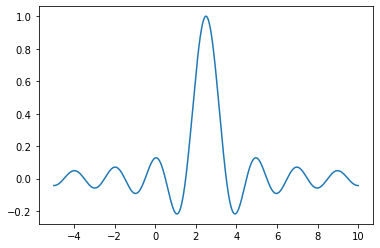

In [7]:
d = 2.5
k = np.linspace(-5,10,1000)
h_ideal = np.sinc(k-d)
plt.plot(k,h_ideal)
plt.show()



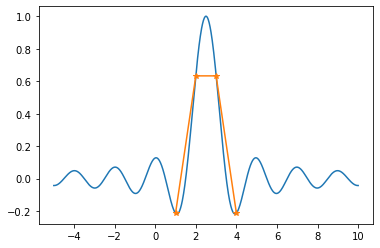

In [8]:
n = 4
window_sample= np.arange(np.round(d-(n-1)/2),np.round(d+(n+1)/2))
window = []
for ws in window_sample:  
    idx = (np.abs(k-ws)).argmin()
    window.append(idx)
    
plt.plot(k,h_ideal)
plt.plot(window_sample,h_ideal[window],"-*")
plt.show()

# Frequensbereich Faltung 

In [11]:
sample_rate= 32e3
nsample= 4 
t = 1 /  nsample 

0.25

In [ ]:
f_tabs = np.exp((-2j*np.pi*t))